ANALYSE EXPLORATOIRE DES DONNÉES

✅ Dataset chargé : 962 lignes, 2 colonnes

📊 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None

📋 Premières lignes :
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \nMay 2013 to May 2017 B.E  ...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \n MCA   YMCAUST,  Faridabad...

🏷️ Analyse des catégories :
Nombre de catégories : 25

Catégories : ['Advocate', 'Arts', 'Automation Testing', 'Blockchain', 'Business Analyst', 'Civil Engineer', 'Data 

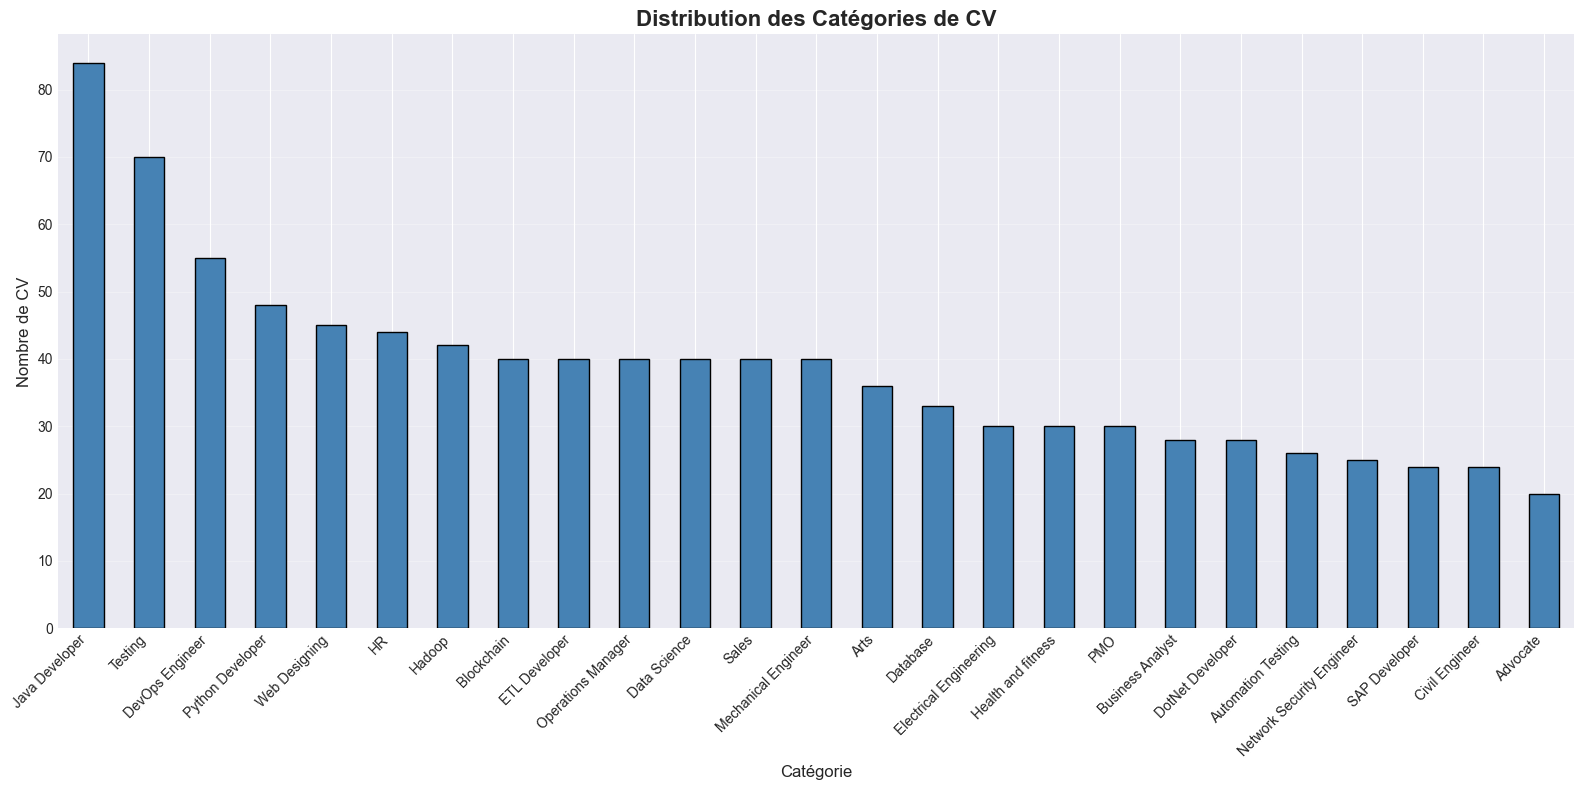


📏 Statistiques de longueur des CV :
Longueur moyenne : 3118 caractères
Longueur min : 134
Longueur max : 14614

Nombre de mots moyen : 450


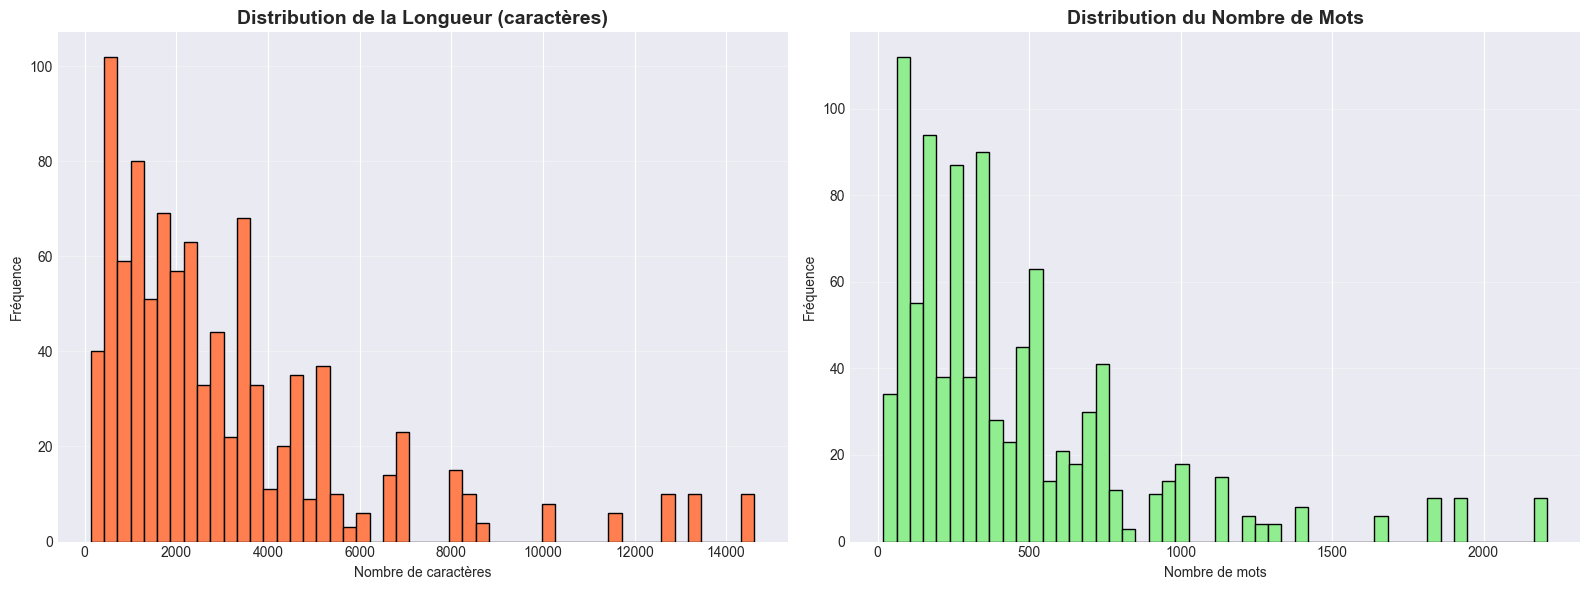


📊 Longueur moyenne par catégorie :
Category
Operations Manager           1740.250000
PMO                           751.000000
Business Analyst              701.357143
Automation Testing            582.307692
Network Security Engineer     580.000000
DevOps Engineer               575.127273
SAP Developer                 559.833333
Database                      553.818182
Hadoop                        521.142857
ETL Developer                 502.200000
Data Science                  459.200000
Mechanical Engineer           440.200000
Civil Engineer                428.000000
Web Designing                 414.600000
DotNet Developer              411.571429
Electrical Engineering        358.600000
Blockchain                    320.800000
Arts                          316.333333
Health and fitness            266.333333
Testing                       263.000000
Python Developer              258.166667
Sales                         250.600000
Java Developer                232.642857
Advocate    

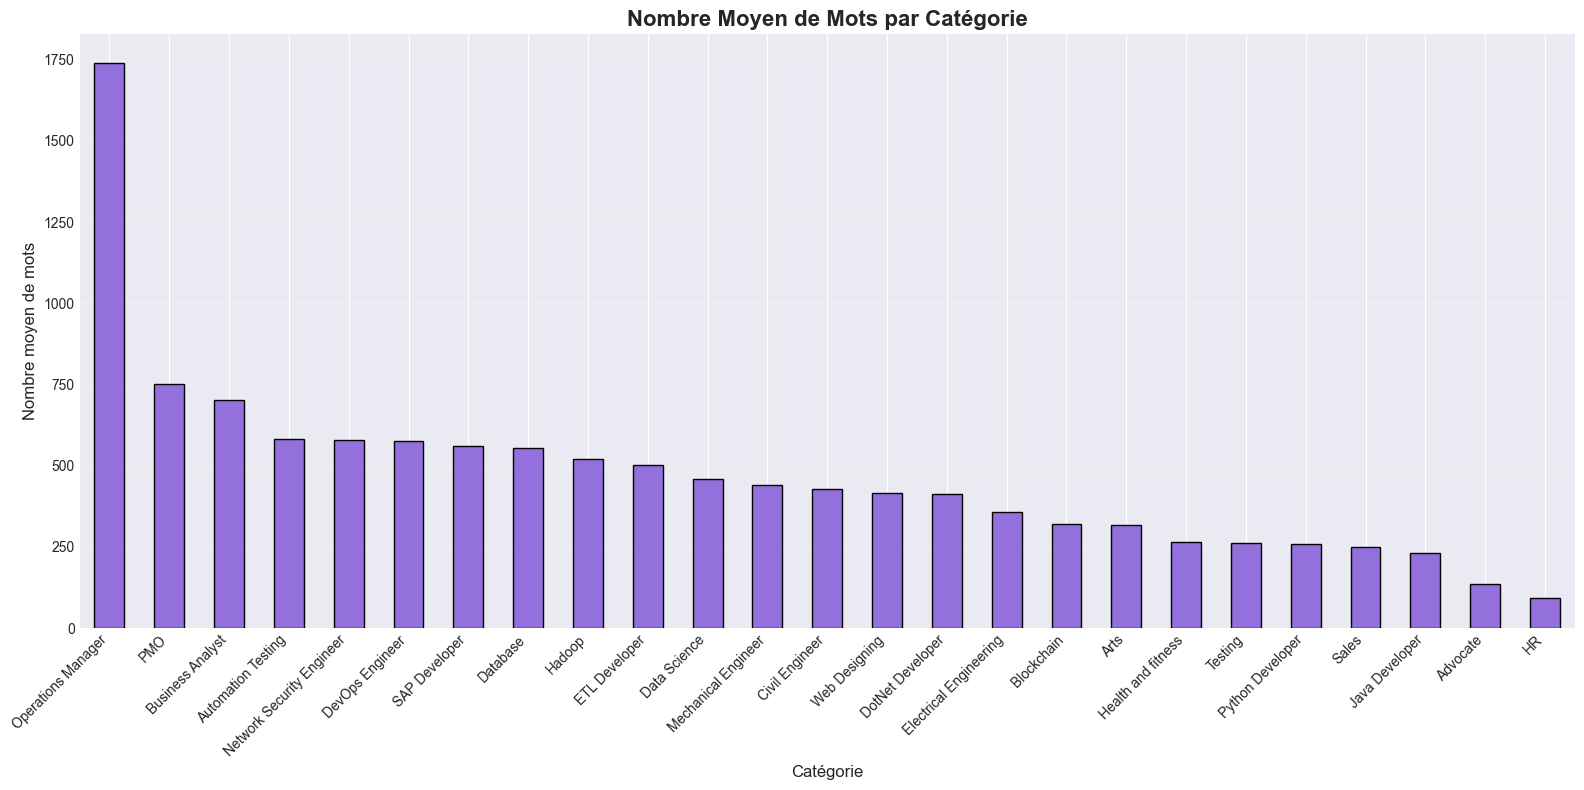


EXEMPLES DE CV PAR CATÉGORIE

📄 Exemple : Data Science
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib...


📄 Exemple : Java Developer
Education Details 
August 2010 to May 2017 BE Electronics & Communication Jabalpur, Madhya Pradesh Takshshila institute of technology
Java developer 


Skill Details 
Java, Javascript,- Exprience - 6 monthsCompany Details 
company - Wab It Softwere Pvt.  Ltd.
description - Jr. Java Developer...


📄 Exemple : HR
TECHNICAL SKILLS â¢ Typewriting â¢ TORA â¢ SPSSEducation Details 
January 2017 MBA  Chidambaram

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. CHARGEMENT DES DONNÉES
print("="*60)
print("ANALYSE EXPLORATOIRE DES DONNÉES")
print("="*60)

df = pd.read_csv('../src/data/UpdatedResumeDataSet.csv')
print(f"\n✅ Dataset chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes")

# 2. INFORMATIONS GÉNÉRALES
print("\n📊 Informations générales :")
print(df.info())
print("\n📋 Premières lignes :")
print(df.head())

# 3. ANALYSE DES CATÉGORIES
print("\n🏷️ Analyse des catégories :")
print(f"Nombre de catégories : {df['Category'].nunique()}")
print(f"\nCatégories : {sorted(df['Category'].unique())}")

category_counts = df['Category'].value_counts()
print("\n📈 Distribution :")
print(category_counts)

# Visualisation 1 : Distribution des catégories
fig, ax = plt.subplots(figsize=(16, 8))
category_counts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Distribution des Catégories de CV', fontsize=16, fontweight='bold')
ax.set_xlabel('Catégorie', fontsize=12)
ax.set_ylabel('Nombre de CV', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/01_category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. ANALYSE DE LA LONGUEUR DES CV
df['resume_length'] = df['Resume'].str.len()
df['word_count'] = df['Resume'].str.split().str.len()

print("\n📏 Statistiques de longueur des CV :")
print(f"Longueur moyenne : {df['resume_length'].mean():.0f} caractères")
print(f"Longueur min : {df['resume_length'].min()}")
print(f"Longueur max : {df['resume_length'].max()}")
print(f"\nNombre de mots moyen : {df['word_count'].mean():.0f}")

# Visualisation 2 : Distribution de la longueur
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df['resume_length'], bins=50, color='coral', edgecolor='black')
axes[0].set_title('Distribution de la Longueur (caractères)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nombre de caractères')
axes[0].set_ylabel('Fréquence')
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(df['word_count'], bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution du Nombre de Mots', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Nombre de mots')
axes[1].set_ylabel('Fréquence')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/02_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. ANALYSE PAR CATÉGORIE
print("\n📊 Longueur moyenne par catégorie :")
length_by_category = df.groupby('Category')['word_count'].mean().sort_values(ascending=False)
print(length_by_category)

# Visualisation 3 : Longueur par catégorie
fig, ax = plt.subplots(figsize=(16, 8))
length_by_category.plot(kind='bar', ax=ax, color='mediumpurple', edgecolor='black')
ax.set_title('Nombre Moyen de Mots par Catégorie', fontsize=16, fontweight='bold')
ax.set_xlabel('Catégorie', fontsize=12)
ax.set_ylabel('Nombre moyen de mots', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/03_length_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. EXEMPLES DE CV
print("\n" + "="*60)
print("EXEMPLES DE CV PAR CATÉGORIE")
print("="*60)

for category in ['Data Science', 'Java Developer', 'HR']:
    print(f"\n{'='*60}")
    print(f"📄 Exemple : {category}")
    print('='*60)
    sample = df[df['Category'] == category]['Resume'].iloc[0]
    print(sample[:500] + "...\n")

# 7. ANALYSE DES MOTS CLÉS
from collections import Counter
import re

def extract_keywords(text):
    """Extrait les mots significatifs"""
    # Mettre en minuscules et extraire les mots
    words = re.findall(r'\b[a-z]+\b', text.lower())
    # Filtrer les mots courts
    words = [w for w in words if len(w) > 3]
    return words

# Analyser les mots les plus fréquents par catégorie
print("\n🔍 Top 10 mots par catégorie :")
for category in ['Data Science', 'Java Developer', 'Mechanical Engineer']:
    texts = df[df['Category'] == category]['Resume'].tolist()
    all_words = []
    for text in texts:
        all_words.extend(extract_keywords(text))
    
    word_freq = Counter(all_words)
    top_words = word_freq.most_common(10)
    
    print(f"\n{category}:")
    for word, count in top_words:
        print(f"  - {word}: {count}")

print("\n✅ Analyse exploratoire terminée !")